#**Product Review Sentiment Analyzer (Python NLP)**

**Summary:- Use Natural Language Processing to analyze and classify customer reviewsfrom an
online store.**

**Question:- How can we classify product reviews as positive or negative using text analysis?**

**Description:-  Apply sentiment analysis using Python’s TextBlob or VADER on sample review text
and generate polarity score.**

#**Read reviewsfrom CSV**

In [11]:
import pandas as pd #importing libraries

In [19]:
#Create dictionary using dict() constructor
data={
    "Review_ID":['R001','R002'],
    "Review_Text":['Review_Text','Waste of money'],
    "Sentiment":['Positive','Negative']
}

# create DataFrame
df=pd.DataFrame(data)

# Writing the DataFrime to a CSV file
df.to_csv('reviews.csv',index=False)

In [23]:
# Reading a CSV file
df=pd.read_csv('reviews.csv')
print(df.head())

  Review_ID     Review_Text Sentiment
0      R001     Review_Text  Positive
1      R002  Waste of money  Negative


# **Use TextBlob to calculate sentiment polarity**

In [28]:
#import library
from textblob import TextBlob

In [33]:
# Function to get polarity using TextBlob
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the function to the Review_Text column
df['Polarity'] = df['Review_Text'].apply(get_polarity)

print(df)

  Review_ID     Review_Text Sentiment  Polarity
0      R001     Review_Text  Positive       0.0
1      R002  Waste of money  Negative      -0.2


# **Classify as Positive, Neutral, or Negative**

In [50]:
# Function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Calculate polarity
df['Polarity'] = df['Review_Text'].apply(get_polarity)

# Classify as Positive, Neutral, or Negative
df['Predicted_Sentiment'] = df['Polarity'].apply(classify_sentiment)

print(df)

  Review_ID     Review_Text Sentiment  Polarity Predicted_Sentiment
0      R001     Review_Text  Positive       0.0             Neutral
1      R002  Waste of money  Negative      -0.2            Negative


# **Visualize distribution using pie chart**

In [39]:
import matplotlib.pyplot as plt

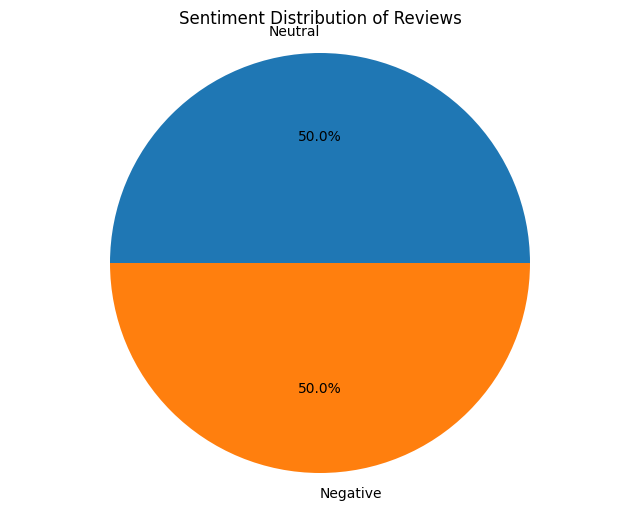

In [61]:
# Calculate counts
sentiment_counts = df['Predicted_Sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution of Reviews')
plt.axis('equal')
plt.show()
